In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file, exact_m
from blume.run import ModelParameters, Results
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

# Determine optimal $\chi$

In [3]:
results = Results(varying_param="chi", range=[chi for chi in range(10, 31)])
params = ModelParameters(T_range=[T_c], tol=1e-9, b_c=True, fixed=True, bar=False, max_steps=496)
results.get(params)

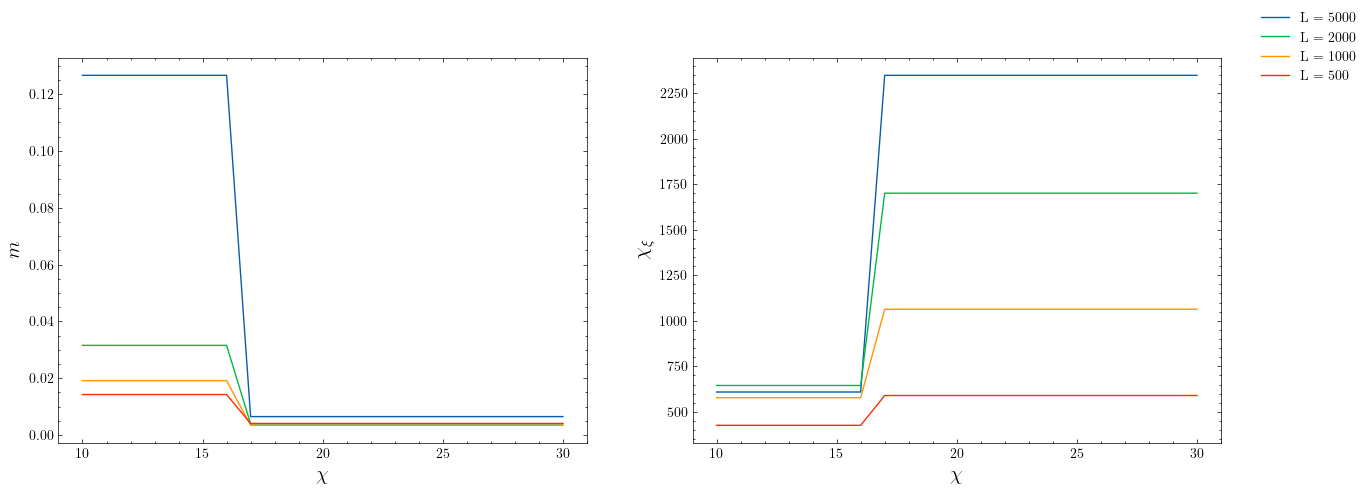

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for dir in ["29-04 11:26", "29-04 11:41", "29-04 11:23", "29-04 11:43"]:
    mags, corrs = [], []
    chis = [chi for chi in range(10, 31)]
    for chi in chis:
        data = read(dir, f"chi{chi}")
        mags.extend(compute(Prop.m, data))
        corrs.extend(compute(Prop.xi, data))


    ax1.plot(chis, mags, "-", label=f"L = {data['max_steps']+4}")
    ax2.plot(chis, corrs, "-")

fig.legend()
ax1.set_xlabel("$\chi$", fontsize=15) 
ax1.set_ylabel("$m$", fontsize=15)
ax2.set_xlabel("$\chi$", fontsize=15)
ax2.set_ylabel(r"$\chi_{\xi}$", fontsize=15)
ax1.locator_params(axis='x', nbins=7)
ax2.locator_params(axis='x', nbins=7)

plt.show()

# Phase diagram of finite system for $\chi$ > 16

In [5]:
results = Results(varying_param="max_steps", range=[496, 996, 4996, 9996])
params = ModelParameters(chi = 18, T_range=(2.25, 2.29), step=0.0001, tol=1e-15, b_c=True, fixed=True)
results.get(params)

max_steps=496: 100%|██████████| 401/401 [07:36<00:00,  1.14s/it]


Saving data in folder: '30-04 02:25'
Done 



max_steps=996: 100%|██████████| 401/401 [15:12<00:00,  2.28s/it]


Saving data in folder: '30-04 02:25'
Done 



max_steps=4996: 100%|██████████| 401/401 [55:57<00:00,  8.37s/it] 


Saving data in folder: '30-04 02:25'
Done 



max_steps=9996: 100%|██████████| 401/401 [1:37:27<00:00, 14.58s/it]  


Saving data in folder: '30-04 02:25'
Done 



In [6]:
# Make dir for saving the plots
dir = "30-04 02:25"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

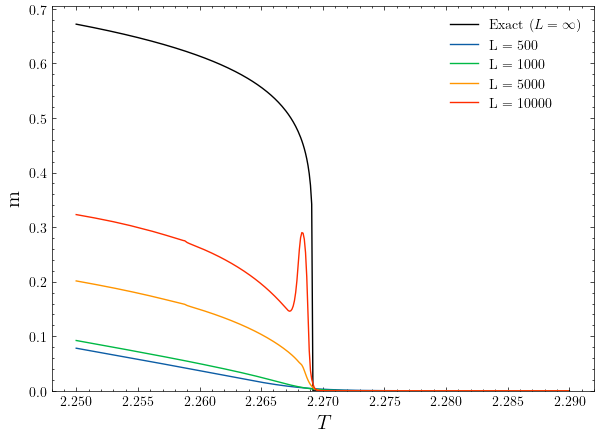

In [7]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="Exact ($L = \infty$)")

for size in [496, 996, 4996, 9996]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

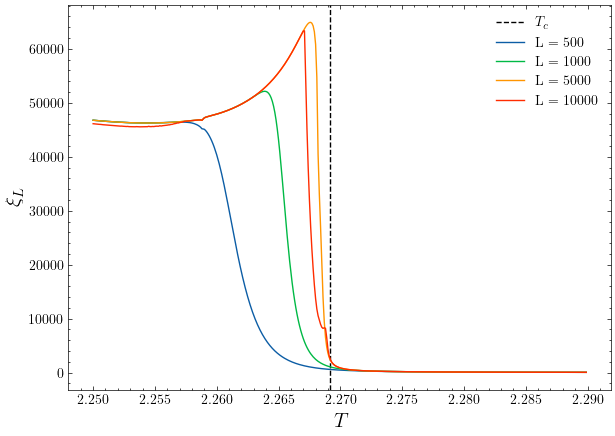

In [8]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for size in [496, 996, 4996, 9996]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")

# Phase diagram of finite system for $\chi \leq 16$

In [56]:
results = Results(varying_param="max_steps", range=[496, 996, 1996, 4496])
params = ModelParameters(chi = 16, T_range=(2.25, 2.28), step=0.0005, tol=1e-15, b_c=True, fixed=True)
results.get(params)

max_steps=496: 100%|██████████| 60/60 [00:36<00:00,  1.64it/s]


Saving data in folder: '30-04 15:14'
Done 



max_steps=996: 100%|██████████| 60/60 [01:12<00:00,  1.22s/it]


Saving data in folder: '30-04 15:14'
Done 



max_steps=1996: 100%|██████████| 60/60 [02:25<00:00,  2.43s/it]


Saving data in folder: '30-04 15:14'
Done 



max_steps=4496: 100%|██████████| 60/60 [05:00<00:00,  5.01s/it]

Saving data in folder: '30-04 15:14'
Done 



In [57]:
# Make dir for saving the plots
dir = "30-04 15:14"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

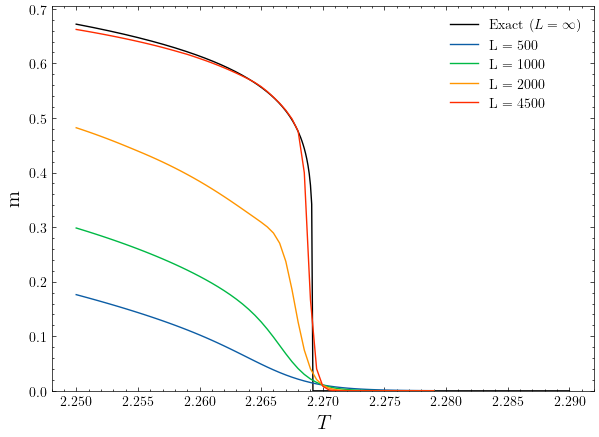

In [59]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="Exact ($L = \infty$)")

for size in [496, 996, 1996, 4496]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

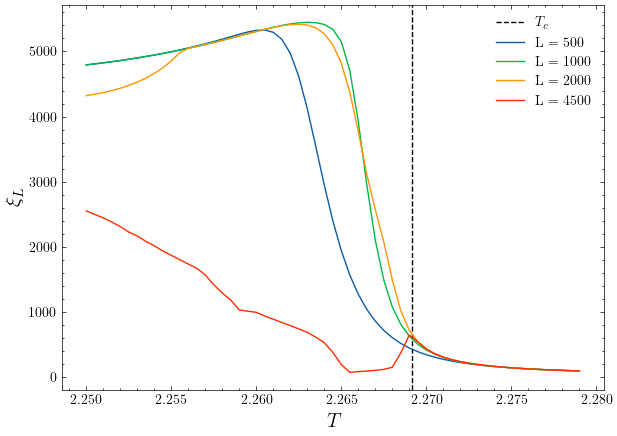

In [61]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for size in [496, 996, 1996, 4496]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")

# Properties at $T_c$ for L in range (100, 5000) and $\chi=20$

In [17]:
T_c = 2 / np.log(1 + np.sqrt(2))
chi_range = [chi for chi in range(10, 25)]
params = ModelParameters(T_range=[T_c],chi=20, tol=1e-9, b_c=True, fixed=True)
result = Results(varying_param="max_steps", range=[L for L in range(100, 5000, 100)])
result.get(params)

max_steps=100: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


Saving data in folder: '30-04 13:56'
Done 



max_steps=200: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Saving data in folder: '30-04 13:56'
Done 



max_steps=300: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Saving data in folder: '30-04 13:56'
Done 



max_steps=400: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving data in folder: '30-04 13:56'
Done 



max_steps=500: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=600: 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=700: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=800: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=900: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1000: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1100: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1200: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1300: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1400: 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1500: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1600: 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1700: 100%|██████████| 1/1 [00:04<00:00,  4.00s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1800: 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=1900: 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2000: 100%|██████████| 1/1 [00:04<00:00,  4.73s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2100: 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2200: 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2300: 100%|██████████| 1/1 [00:05<00:00,  5.45s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2400: 100%|██████████| 1/1 [00:05<00:00,  5.74s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2500: 100%|██████████| 1/1 [00:05<00:00,  5.88s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2600: 100%|██████████| 1/1 [00:06<00:00,  6.13s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2700: 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2800: 100%|██████████| 1/1 [00:06<00:00,  6.61s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=2900: 100%|██████████| 1/1 [00:06<00:00,  6.83s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3000: 100%|██████████| 1/1 [00:07<00:00,  7.08s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3100: 100%|██████████| 1/1 [00:07<00:00,  7.31s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3200: 100%|██████████| 1/1 [00:07<00:00,  7.58s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3300: 100%|██████████| 1/1 [00:07<00:00,  7.78s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3400: 100%|██████████| 1/1 [00:08<00:00,  8.02s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3500: 100%|██████████| 1/1 [00:08<00:00,  8.29s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3600: 100%|██████████| 1/1 [00:08<00:00,  8.51s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3700: 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3800: 100%|██████████| 1/1 [00:09<00:00,  9.11s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=3900: 100%|██████████| 1/1 [00:09<00:00,  9.32s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4000: 100%|██████████| 1/1 [00:09<00:00,  9.51s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4100: 100%|██████████| 1/1 [00:09<00:00,  9.67s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4200: 100%|██████████| 1/1 [00:09<00:00,  9.94s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4300: 100%|██████████| 1/1 [00:10<00:00, 10.12s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4400: 100%|██████████| 1/1 [00:10<00:00, 10.42s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4500: 100%|██████████| 1/1 [00:10<00:00, 10.60s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4600: 100%|██████████| 1/1 [00:10<00:00, 10.86s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4700: 100%|██████████| 1/1 [00:11<00:00, 11.11s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4800: 100%|██████████| 1/1 [00:11<00:00, 11.33s/it]


Saving data in folder: '30-04 13:56'
Done 



max_steps=4900: 100%|██████████| 1/1 [00:11<00:00, 11.55s/it]

Saving data in folder: '30-04 13:56'
Done 



In [43]:
mags, xis = [], []
sizes = [size for size in range(100, 5000, 100)]
dir = "30-04 13:56"
for size in sizes:
    data = read(folder=dir, fn=f"max_steps{size}")
    mags.extend(compute(Prop.m, data))
    xis.extend(compute(Prop.xi, data))

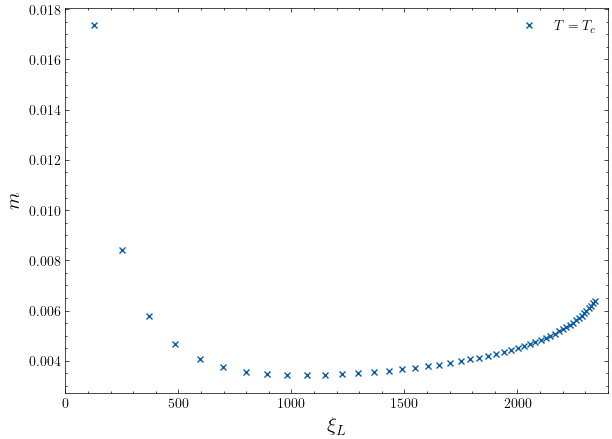

In [47]:
plt.figure(figsize=(7, 5))
plt.plot(xis, mags, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$\xi_{L}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.xlim(0, 2400)
plt.show()

## Properties at $T_c$ for L in range(10, 1000)

In [34]:
params = ModelParameters(T_range=[T_c],chi=20, tol=1e-9, b_c=True, fixed=True)
result = Results(varying_param="max_steps", range=[L for L in range(10, 1000, 10)])
result.get(params)

max_steps=10: 100%|██████████| 1/1 [00:00<00:00, 51.81it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=20: 100%|██████████| 1/1 [00:00<00:00, 18.55it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=30: 100%|██████████| 1/1 [00:00<00:00, 14.99it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=40: 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=50: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=60: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=70: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=80: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=90: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=100: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=110: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=120: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=130: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=140: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=150: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=160: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=170: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=180: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=190: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=200: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=210: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=220: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=230: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=240: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=250: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=260: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=270: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=280: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=290: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=300: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=310: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=320: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=330: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=340: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=350: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=360: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=370: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=380: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=390: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=400: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=410: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=420: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=430: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


Saving data in folder: '30-04 14:11'
Done 



max_steps=440: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=450: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=460: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=470: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=480: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=490: 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=500: 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=510: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=520: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=530: 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=540: 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=550: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=560: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=570: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=580: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=590: 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=600: 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=610: 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=620: 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=630: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=640: 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=650: 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=660: 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=670: 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=680: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=690: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=700: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=710: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=720: 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=730: 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=740: 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=750: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=760: 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=770: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=780: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=790: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=800: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=810: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=820: 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=830: 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=840: 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=850: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=860: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=870: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=880: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=890: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=900: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=910: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=920: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=930: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=940: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=950: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=960: 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=970: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=980: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Saving data in folder: '30-04 14:11'
Done 



max_steps=990: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

Saving data in folder: '30-04 14:11'
Done 



In [36]:
mags, xis = [], []
sizes = [size for size in range(10, 1000, 10)]
dir = "30-04 14:11"
for size in sizes:
    data = read(folder=dir, fn=f"max_steps{size}")
    mags.extend(compute(Prop.m, data))
    xis.extend(compute(Prop.xi, data))

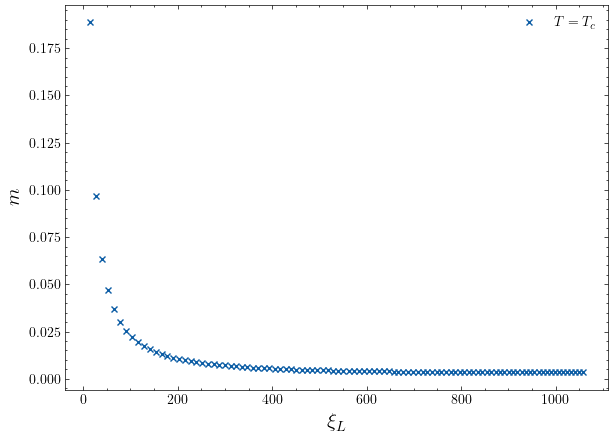

In [37]:
plt.figure(figsize=(7, 5))
plt.plot(xis, mags, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$\xi_{L}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.show()

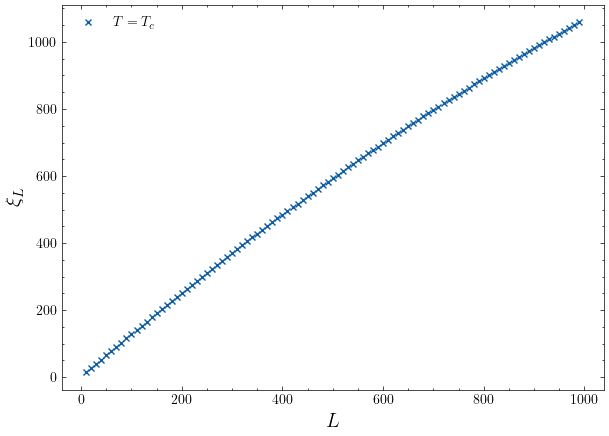

In [38]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, xis, "x", markersize=5, label=f"$T = T_c$")
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.xlabel("$L$", fontsize=15)
plt.legend()
plt.show()

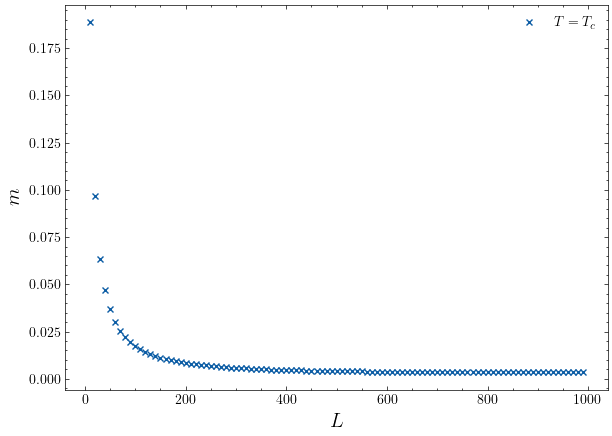

In [39]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, mags, "x", markersize=5, label=f"$T = T_c$")
plt.ylabel(r"$m$", fontsize=15)
plt.xlabel("$L$", fontsize=15)
plt.legend()
plt.show()

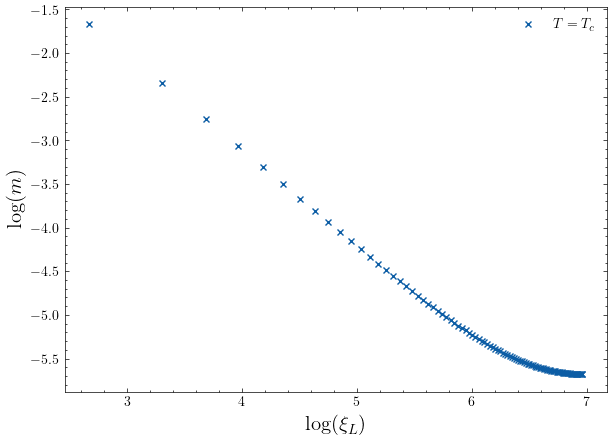

In [40]:
xis_log = [np.log(xi) for xi in xis]
mags_log = [np.log(m) for m in mags]

plt.figure(figsize=(7, 5))
plt.plot(xis_log, mags_log, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$\log(\xi_{L})$", fontsize=15)
plt.ylabel("$\log(m)$", fontsize=15)
plt.legend()
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 16
    # variables        = 2
    chi-square         = 5.6409e-04
    reduced chi-square = 4.0292e-05
    Akaike info crit   = -160.046211
    Bayesian info crit = -158.501033
    R-squared          = 0.99994571
[[Variables]]
    a:  1.09864916 +/- 0.00216353 (0.20%) (init = 0.5)
    b:  1.28401749 +/- 0.00983189 (0.77%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9869


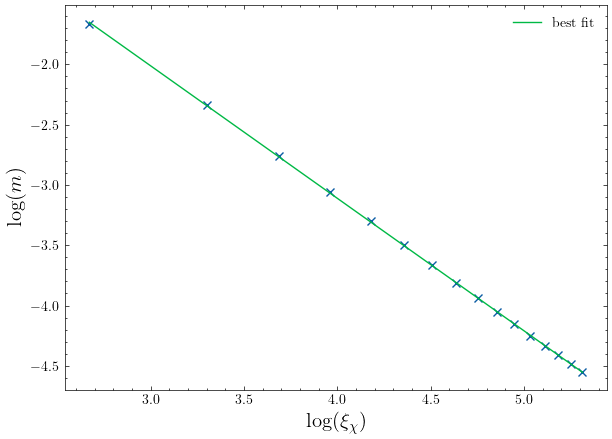

In [41]:
model = Model(lambda x, a, b: -a*x+b)

x, y = xis_log[:16], mags_log[:16]

params = model.make_params(a=0.5, b=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\log(\xi_{\chi})$", fontsize=15)
plt.ylabel("$\log(m)$", fontsize=15)
plt.legend()
plt.show()

In [42]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")

Obtained crit. exp.: 1.0986491619665648 +/- 0.002163525746021921


# Properties at $T_c$ for L in range (100, 1000) and $\chi=45$

In [62]:
params = ModelParameters(T_range=[T_c],chi=45, tol=1e-9, b_c=True, fixed=True)
result = Results(varying_param="max_steps", range=[L for L in range(10, 1000, 10)])
result.get(params)

max_steps=10: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


Saving data in folder: '30-04 15:30'
Done 



max_steps=20: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Saving data in folder: '30-04 15:30'
Done 



max_steps=30: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving data in folder: '30-04 15:30'
Done 



max_steps=40: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


Saving data in folder: '30-04 15:30'
Done 



max_steps=50: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Saving data in folder: '30-04 15:30'
Done 



max_steps=60: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=70: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=80: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=90: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=100: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=110: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=120: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=130: 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=140: 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=150: 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=160: 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=170: 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=180: 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=190: 100%|██████████| 1/1 [00:05<00:00,  5.21s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=200: 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=210: 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=220: 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=230: 100%|██████████| 1/1 [00:04<00:00,  4.54s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=240: 100%|██████████| 1/1 [00:06<00:00,  6.62s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=250: 100%|██████████| 1/1 [00:06<00:00,  6.77s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=260: 100%|██████████| 1/1 [00:08<00:00,  8.40s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=270: 100%|██████████| 1/1 [00:07<00:00,  7.28s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=280: 100%|██████████| 1/1 [00:07<00:00,  7.64s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=290: 100%|██████████| 1/1 [00:08<00:00,  8.04s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=300: 100%|██████████| 1/1 [00:08<00:00,  8.22s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=310: 100%|██████████| 1/1 [00:06<00:00,  6.48s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=320: 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=330: 100%|██████████| 1/1 [00:05<00:00,  5.46s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=340: 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=350: 100%|██████████| 1/1 [00:06<00:00,  6.13s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=360: 100%|██████████| 1/1 [00:10<00:00, 10.01s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=370: 100%|██████████| 1/1 [00:10<00:00, 10.42s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=380: 100%|██████████| 1/1 [00:05<00:00,  5.59s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=390: 100%|██████████| 1/1 [00:08<00:00,  8.23s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=400: 100%|██████████| 1/1 [00:11<00:00, 11.30s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=410: 100%|██████████| 1/1 [00:09<00:00,  9.43s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=420: 100%|██████████| 1/1 [00:09<00:00,  9.46s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=430: 100%|██████████| 1/1 [00:08<00:00,  8.26s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=440: 100%|██████████| 1/1 [00:06<00:00,  6.66s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=450: 100%|██████████| 1/1 [00:07<00:00,  7.90s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=460: 100%|██████████| 1/1 [00:07<00:00,  7.04s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=470: 100%|██████████| 1/1 [00:10<00:00, 10.80s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=480: 100%|██████████| 1/1 [00:13<00:00, 13.91s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=490: 100%|██████████| 1/1 [00:14<00:00, 14.15s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=500: 100%|██████████| 1/1 [00:07<00:00,  7.66s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=510: 100%|██████████| 1/1 [00:07<00:00,  7.98s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=520: 100%|██████████| 1/1 [00:12<00:00, 12.98s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=530: 100%|██████████| 1/1 [00:14<00:00, 14.63s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=540: 100%|██████████| 1/1 [00:14<00:00, 14.73s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=550: 100%|██████████| 1/1 [00:14<00:00, 14.91s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=560: 100%|██████████| 1/1 [00:15<00:00, 15.26s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=570: 100%|██████████| 1/1 [00:16<00:00, 16.12s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=580: 100%|██████████| 1/1 [00:15<00:00, 15.71s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=590: 100%|██████████| 1/1 [00:17<00:00, 17.59s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=600: 100%|██████████| 1/1 [00:16<00:00, 16.93s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=610: 100%|██████████| 1/1 [00:16<00:00, 16.65s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=620: 100%|██████████| 1/1 [00:13<00:00, 13.18s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=630: 100%|██████████| 1/1 [00:15<00:00, 15.77s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=640: 100%|██████████| 1/1 [00:12<00:00, 12.25s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=650: 100%|██████████| 1/1 [00:18<00:00, 18.39s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=660: 100%|██████████| 1/1 [00:12<00:00, 12.67s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=670: 100%|██████████| 1/1 [00:18<00:00, 18.99s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=680: 100%|██████████| 1/1 [00:18<00:00, 18.50s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=690: 100%|██████████| 1/1 [00:19<00:00, 19.12s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=700: 100%|██████████| 1/1 [00:19<00:00, 19.15s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=710: 100%|██████████| 1/1 [00:20<00:00, 20.05s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=720: 100%|██████████| 1/1 [00:19<00:00, 20.00s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=730: 100%|██████████| 1/1 [00:20<00:00, 20.02s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=740: 100%|██████████| 1/1 [00:20<00:00, 20.78s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=750: 100%|██████████| 1/1 [00:21<00:00, 21.12s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=760: 100%|██████████| 1/1 [00:14<00:00, 14.37s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=770: 100%|██████████| 1/1 [00:21<00:00, 21.55s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=780: 100%|██████████| 1/1 [00:17<00:00, 17.88s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=790: 100%|██████████| 1/1 [00:14<00:00, 14.86s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=800: 100%|██████████| 1/1 [00:21<00:00, 21.19s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=810: 100%|██████████| 1/1 [00:12<00:00, 12.42s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=820: 100%|██████████| 1/1 [00:12<00:00, 12.53s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=830: 100%|██████████| 1/1 [00:18<00:00, 18.20s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=840: 100%|██████████| 1/1 [00:24<00:00, 24.04s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=850: 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=860: 100%|██████████| 1/1 [00:22<00:00, 22.21s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=870: 100%|██████████| 1/1 [00:24<00:00, 24.27s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=880: 100%|██████████| 1/1 [00:16<00:00, 16.14s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=890: 100%|██████████| 1/1 [00:19<00:00, 19.65s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=900: 100%|██████████| 1/1 [00:23<00:00, 23.80s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=910: 100%|██████████| 1/1 [00:22<00:00, 22.42s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=920: 100%|██████████| 1/1 [00:24<00:00, 24.74s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=930: 100%|██████████| 1/1 [00:26<00:00, 26.66s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=940: 100%|██████████| 1/1 [00:16<00:00, 16.01s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=950: 100%|██████████| 1/1 [00:22<00:00, 22.12s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=960: 100%|██████████| 1/1 [00:32<00:00, 32.44s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=970: 100%|██████████| 1/1 [00:28<00:00, 28.32s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=980: 100%|██████████| 1/1 [00:29<00:00, 29.10s/it]


Saving data in folder: '30-04 15:30'
Done 



max_steps=990: 100%|██████████| 1/1 [00:28<00:00, 28.54s/it]

Saving data in folder: '30-04 15:30'
Done 



In [63]:
mags, xis = [], []
sizes = [size for size in range(10, 1000, 10)]
dir = "30-04 15:30"
for size in sizes:
    data = read(folder=dir, fn=f"max_steps{size}")
    mags.extend(compute(Prop.m, data))
    xis.extend(compute(Prop.xi, data))

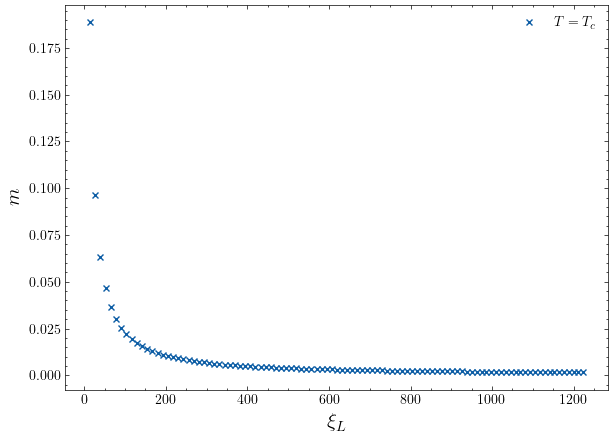

In [64]:
plt.figure(figsize=(7, 5))
plt.plot(xis, mags, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$\xi_{L}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 80
    # variables        = 2
    chi-square         = 0.02304468
    reduced chi-square = 2.9544e-04
    Akaike info crit   = -648.187748
    Bayesian info crit = -643.423695
    R-squared          = 0.99969706
[[Variables]]
    a:  1.09248920 +/- 0.00215336 (0.20%) (init = 0.5)
    b:  1.24313912 +/- 0.01298747 (1.04%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9890


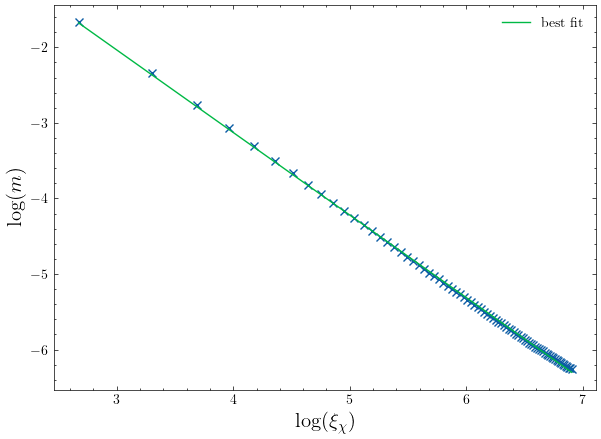

In [69]:
model = Model(lambda x, a, b: -a*x+b)

x, y = xis_log[:80], mags_log[:80]

params = model.make_params(a=0.5, b=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\log(\xi_{\chi})$", fontsize=15)
plt.ylabel("$\log(m)$", fontsize=15)
plt.legend()
plt.show()

In [70]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")

Obtained crit. exp.: 1.0924892029801108 +/- 0.00215336343111046
